In [23]:
%pip install lightgbm


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


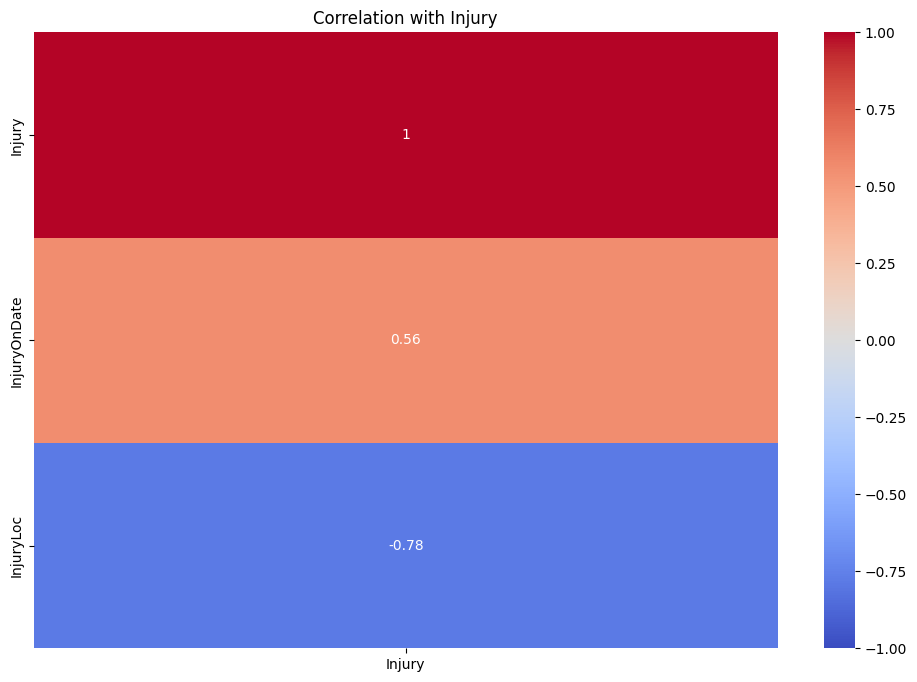

c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

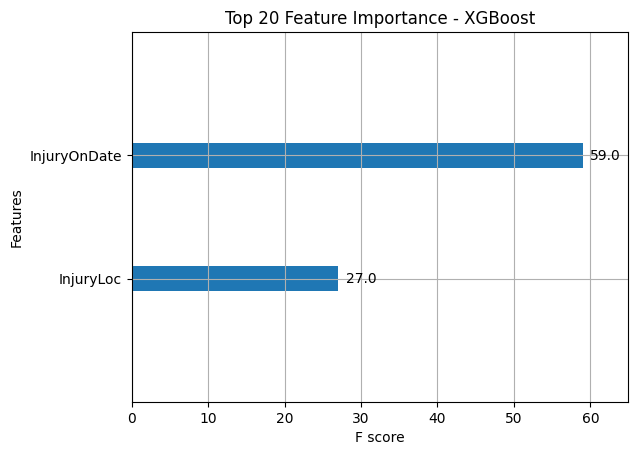

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Load your data
data = pd.read_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/feature_data.csv')

# Clean data if necessary
def clean_data(data):
    # Fill NaNs
    for column in data.columns:
        if data[column].isna().sum() > 0:
            if data[column].dtype in ['float64', 'int64']:
                data[column].fillna(data[column].median(), inplace=True)
            else:
                data[column].fillna(data[column].mode()[0], inplace=True)
    return data

data = clean_data(data)

# Label encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Correlation Matrix - Focus on Injury
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Injury']].sort_values(by='Injury', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with Injury")
plt.show()

# XGBoost for Feature Importance
X = data.drop(columns=['Injury'])
y = data['Injury']

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y)

# Plot top 20 features
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, max_num_features=20)
plt.title("Top 20 Feature Importance - XGBoost")
plt.show()

# Save feature importance to analyze further
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.to_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/feature_importance.csv', index=False)

# Further refine based on results


In [10]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load data
data_path = 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/engineered_data.csv'
data = pd.read_csv(data_path)

# List of essential features you want to include
essential_features = [
    'age', 'height', 'Mass', 'Gender', 'Dominance', 'Level', 'Experience', 
    'SessionsPerWk', 'Treadmill', 'Aslphalt', 'Grass', 'Trail', 'Sand', 
    'Concrete', 'SurfaceAlt', 'RunGrp', 'Volume', 'Pace', 'RaceDist', 
    'InjuryLoc', 'DiagnosticMed', 'Diagnostic', 'InjuryOnDate', 'ShoeSize', 
    'ShoeBrand', 'ShoeModel', 'ShoePairs', 'ShoeChange', 'ShoeComfort', 
    'ShoeInsert', 'RFSI25', 'RFSI35', 'RFSI45', 'LFSI25', 'LFSI35', 'LFSI45', 
    'RThomas', 'LThomas', 'ROber', 'LOber', 'RHIPABD', 'LHIPABD', 'RHIPEXT', 
    'LHIPEXT', 'RHIPER', 'LHIPER', 'RHIPIR', 'LHIPIR', 'Recent_Injury', 
    'InjuryYear', 'InjuryMonth', 'InjuryDay', 'Age_Pace_Interaction', 
    'Log_Volume'
]

# Filter out the features that are not present in the dataset
available_features = [feature for feature in essential_features if feature in data.columns]

# Prepare features and target
X = data[available_features]
y = data['Injury']

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score}")

# Train the final model with the best parameters
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
final_model.fit(X, y)

# Save the final model
model_output_path = 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/models/final_xgboost_model_full_features.pkl'
final_model.save_model(model_output_path)
print(f"Final model saved to {model_output_path}")

# Evaluate the final model
y_pred = final_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.9996845260003155
Final model saved to D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/models/final_xgboost_model_full_features.pkl
Accuracy: 0.9996494733336838
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     45704
           1       1.00      1.00      1.00     11353

    accuracy                           1.00     57057
   macro avg       1.00      1.00      1.00     57057
weighted avg       1.00      1.00      1.00     57057



c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:22:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Load data
data_path = 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/engineered_data.csv'
data = pd.read_csv(data_path)

# Select the best 20 features for injury prediction
best_features = [
    'age', 'height', 'Mass', 'Gender', 'Dominance', 
    'Experience', 'SessionsPerWk', 'Treadmill', 'Grass', 
    'Trail', 'Volume', 'Pace', 'RaceDist', 'InjuryLoc', 
    'DiagnosticMed', 'ShoeSize', 'RFSI25', 'LFSI25', 
    'RHIPEXT', 'Recent_Injury'
]

# Prepare features and target
X = data[best_features]
y = data['Injury']

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Set up the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform the grid search
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score}")

# Train the final model with the best parameters
final_model = xgb.XGBClassifier(**best_params, eval_metric='mlogloss')
final_model.fit(X, y)

# Save the final model
model_output_path = 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/models/final_xgboost_model_best_20_features.pkl'
final_model.save_model(model_output_path)
print(f"Final model saved to {model_output_path}")

# Evaluate the final model
y_pred = final_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy: 0.9600925390399074
Final model saved to D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/models/final_xgboost_model_best_20_features.pkl
Accuracy: 0.9600925390399074
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     45704
           1       1.00      0.80      0.89     11353

    accuracy                           0.96     57057
   macro avg       0.98      0.90      0.93     57057
weighted avg       0.96      0.96      0.96     57057



c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:25:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib

# Load your data
data = pd.read_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/merged_data.csv')

# Handle missing data if any (optional)
data.fillna(0, inplace=True)  # You can customize this step as needed

# Convert the necessary columns to 'category' dtype for XGBoost
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Separate features and target
X = data.drop(columns=['Injury'])  # Assuming 'Injury' is the target column
y = data['Injury']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with enable_categorical=True
model = XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)

# Save the model using joblib
model_path = 'D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/models/final_xgboost_model.pkl'
joblib.dump(model, model_path)

print("Model trained and saved successfully.")


Model trained and saved successfully.


c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


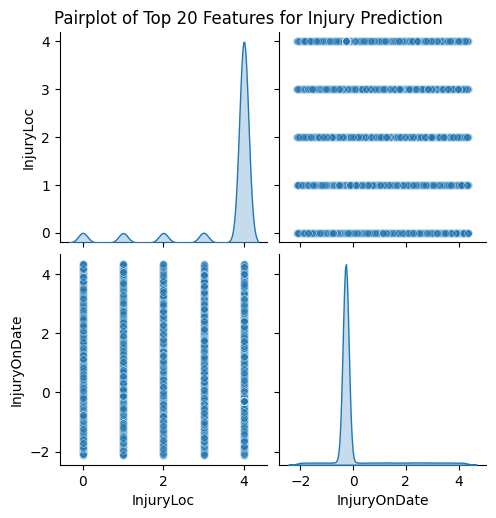

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/feature_data.csv')

# Clean data if necessary
def clean_data(data):
    # Fill NaNs
    for column in data.columns:
        if data[column].isna().sum() > 0:
            if data[column].dtype in ['float64', 'int64']:
                data[column].fillna(data[column].median(), inplace=True)
            else:
                data[column].fillna(data[column].mode()[0], inplace=True)
    return data

data = clean_data(data)

# Label encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# XGBoost for Feature Importance
X = data.drop(columns=['Injury'])  # Exclude the target variable from the features
y = data['Injury']  # Target variable

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y)

# Get the top 20 features based on importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_20_features = importance_df['Feature'].head(20).tolist()

# Create a pairplot of the top 20 features
sns.pairplot(data[top_20_features], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30})
plt.suptitle('Pairplot of Top 20 Features for Injury Prediction', y=1.02)
plt.show()


c:\Users\Neethiarasu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


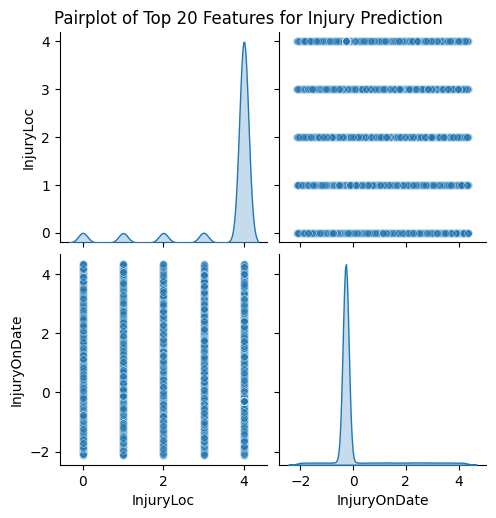

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/feature_data.csv')

# Clean data if necessary
def clean_data(data):
    # Fill NaNs
    for column in data.columns:
        if data[column].isna().sum() > 0:
            if data[column].dtype in ['float64', 'int64']:
                data[column].fillna(data[column].median(), inplace=True)
            else:
                data[column].fillna(data[column].mode()[0], inplace=True)
    return data

data = clean_data(data)

# Label encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# XGBoost for Feature Importance
X = data.drop(columns=['Injury'])  # Exclude the target variable from the features
y = data['Injury']  # Target variable

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y)

# Get the top 20 features based on importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_20_features = importance_df['Feature'].head(20).tolist()

# Create a pairplot of the top 20 features
sns.pairplot(data[top_20_features], diag_kind='kde', plot_kws={'alpha': 0.5, 's': 30})
plt.suptitle('Pairplot of Top 20 Features for Injury Prediction', y=1.02)
plt.show()


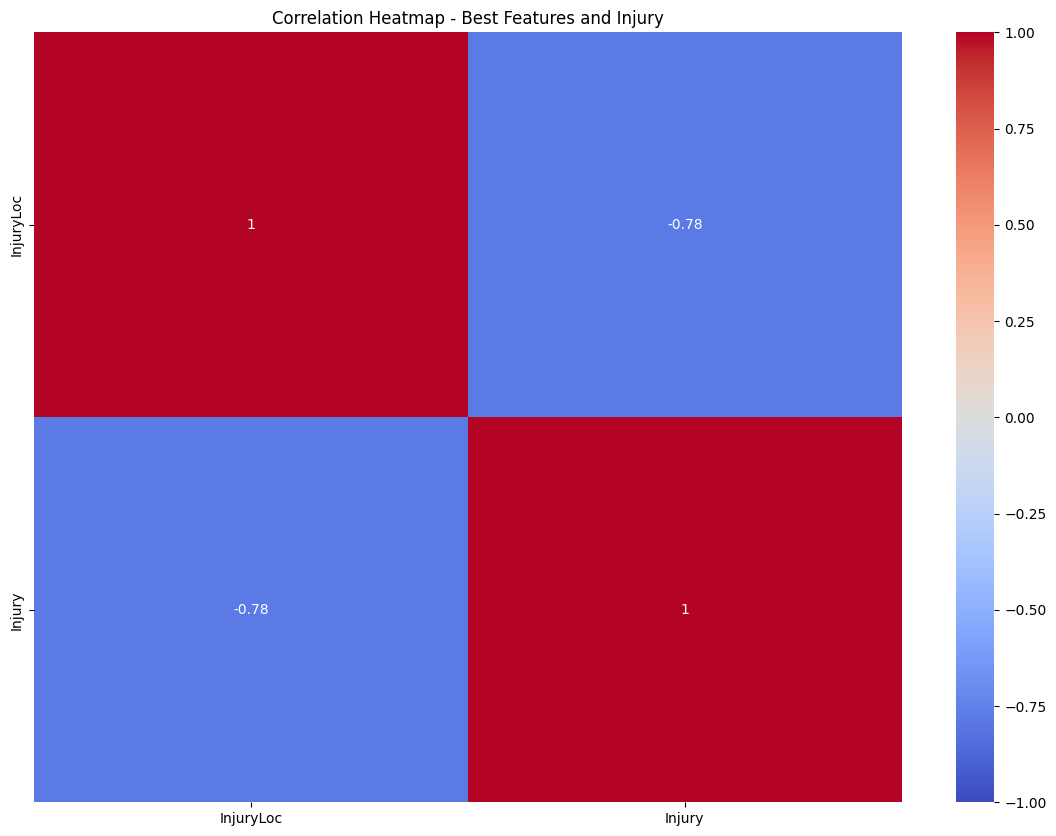

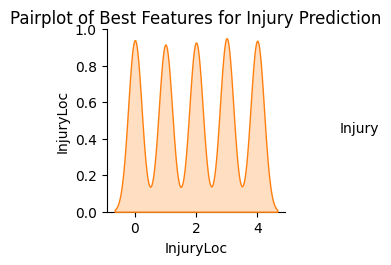

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load your data
data = pd.read_csv('D:/Data science classes slides pdf/Football_analysis/football_analytics_injury_prevention/processed/feature_data.csv')

# Clean data if necessary
def clean_data(data):
    # Fill NaNs
    for column in data.columns:
        if data[column].isna().sum() > 0:
            if data[column].dtype in ['float64', 'int64']:
                data[column].fillna(data[column].median(), inplace=True)
            else:
                data[column].fillna(data[column].mode()[0], inplace=True)
    return data

data = clean_data(data)

# Label encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

# Define the best features based on the available columns in the dataset
best_features = [
    'age', 'height', 'Mass', 'Gender', 'Dominance', 
    'Experience', 'SessionsPerWk', 'Treadmill', 'Grass', 
    'Trail', 'Volume', 'Pace', 'RaceDist', 'InjuryLoc', 
    'DiagnosticMed', 'ShoeSize', 'RFSI25', 'LFSI25', 
    'RHIPEXT', 'Recent_Injury'
]

# Filter the data to include only the best features and the target 'Injury'
available_features = [feature for feature in best_features if feature in data.columns]
data = data[available_features + ['Injury']]

# Correlation Matrix - Focus on Best Features and Injury
correlation_matrix = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Best Features and Injury")
plt.show()

# Pairplot to show relationships between features and injury
sns.pairplot(data, diag_kind='kde', hue='Injury', plot_kws={'alpha': 0.5, 's': 30})
plt.suptitle('Pairplot of Best Features for Injury Prediction', y=1.02)
plt.show()
